In [1]:
# seaborn 데이터 시각화 1
# matplotlib을 더 쉽게 사용할 수 있도록 만든 라이브러리
# pip install seaborn

In [2]:
# [관련 문서들 참고]
# matplot pyplot 공식 도큐먼트 살펴보기 : https://matplotlib.org/stable/gallery/index.html
# seaborn 공식 도큐먼트 살펴보기 : https://seaborn.pydata.org/examples/index.html
# seaborn 내장 데이터셋 : https://seaborn.pydata.org/generated/seaborn.load_dataset.html#
# seaborn 디지털 도서 : https://wikidocs.net/86290

In [3]:
# ready set
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image

# seaborn
import seaborn as sns

In [4]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [6]:
# 0. Seaborn의 장점
# matplotlib으로 대부분의 시각화가 가능하나, seaborn을 사람들이 선호하는 이유

In [7]:
# 0-1. seaborn에서만 제공되는 통계 기반 plot
# https://github.com/mwaskom/seaborn-data/blob/master/tips.csv
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
# tips 데이터 정보
# total_bill: 총 합계 요금표
# tip: 팁
# sex: 성별
# smoker: 흡연자 여부
# day: 요일
# time: 식사 시간
# size: 식사 인원

In [9]:
# 컬럼 이름 변경하고 파일로 저장하기
tips = tips.rename(columns={"sex": "gender"})
import os
path = "datas"
if not os.path.exists(path):
    os.mkdir(path)
tips.to_csv(f"{path}/sns_tips.csv", index=False)

In [10]:
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


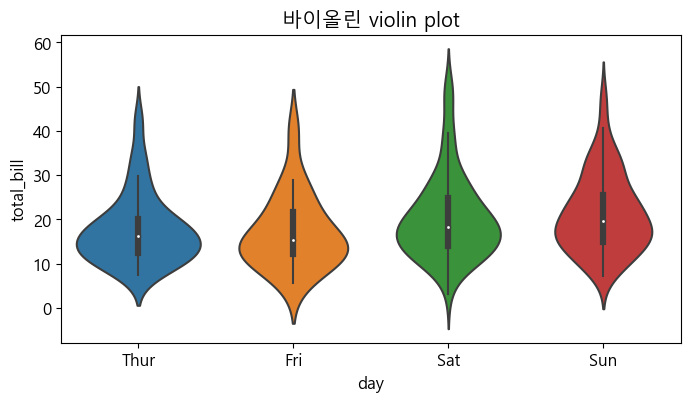

In [11]:
sns.violinplot(data=tips, x='day', y='total_bill')
plt.title('바이올린 violin plot')
plt.show()

In [12]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

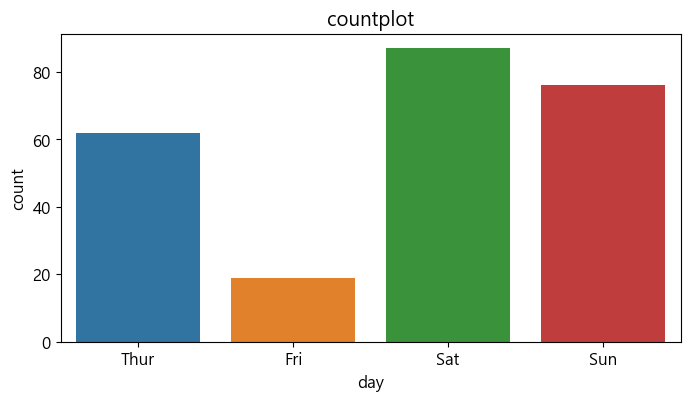

In [13]:
sns.countplot(x=tips['day'])
plt.title('countplot')
plt.show()

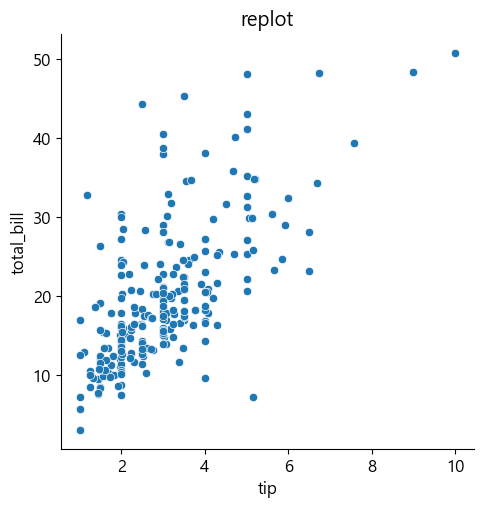

In [14]:
sns.relplot(data=tips, x='tip', y='total_bill')
plt.title('replot')
plt.show()

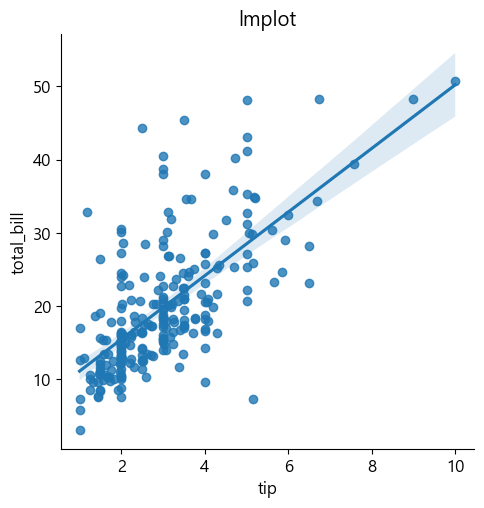

In [15]:
sns.lmplot(data=tips, x='tip', y='total_bill')
plt.title('lmplot')
plt.show()

In [16]:
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [17]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [18]:
# 0-2. 아름다운 스타일링
# seaborn의 최대 장점 중 하나인, 아름다운 컬러팔레트
# matplotlib의 기본 컬러 색상보다 seaborn은 스타일링에 크게 신경을 쓰지 않아도 default 컬러가 예쁘게 조합 됨

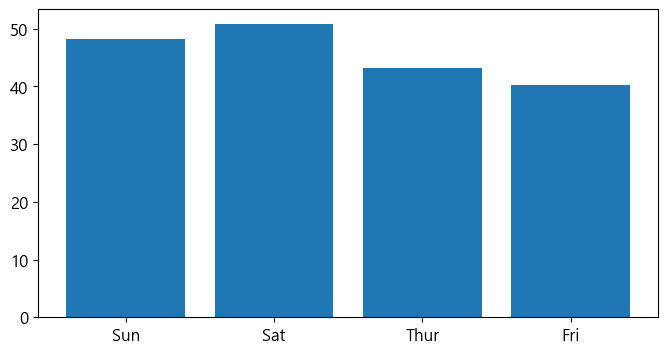

In [19]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

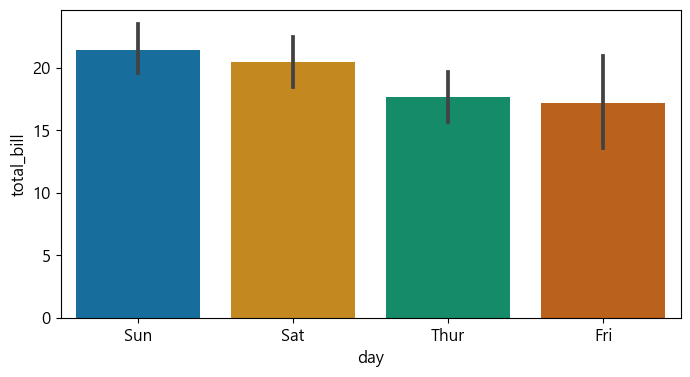

In [20]:
sns.barplot(data=tips, x='day', y='total_bill', palette='colorblind')
plt.show()

In [21]:
# 0-3. 컬러 팔레트
# 자세한 컬러팔레트는 공식 도큐먼트 참고 : https://seaborn.pydata.org/tutorial/color_palettes.html

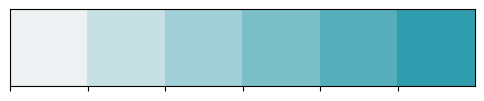

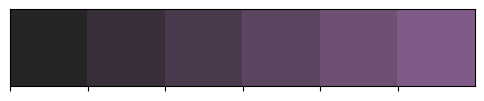

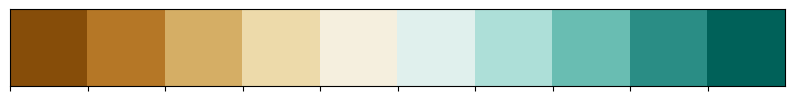

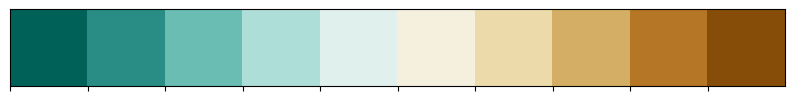

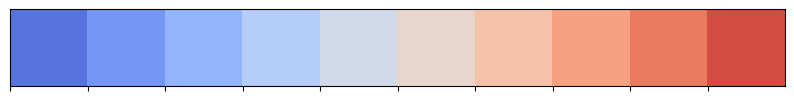

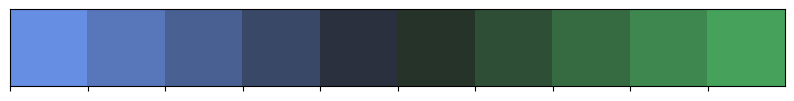

In [22]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

<Axes: xlabel='tip', ylabel='total_bill'>

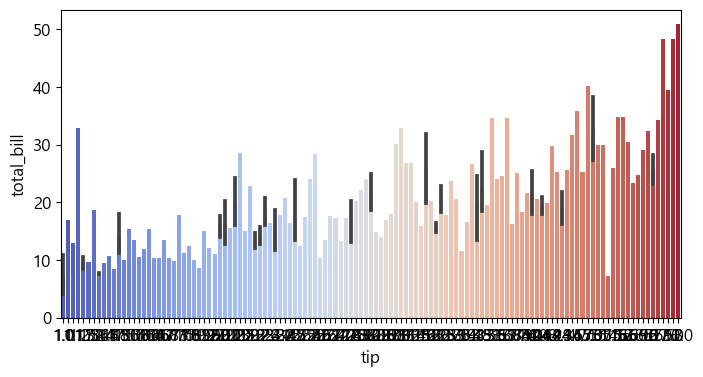

In [23]:
sns.barplot(data=tips, x='tip', y='total_bill', palette='coolwarm')

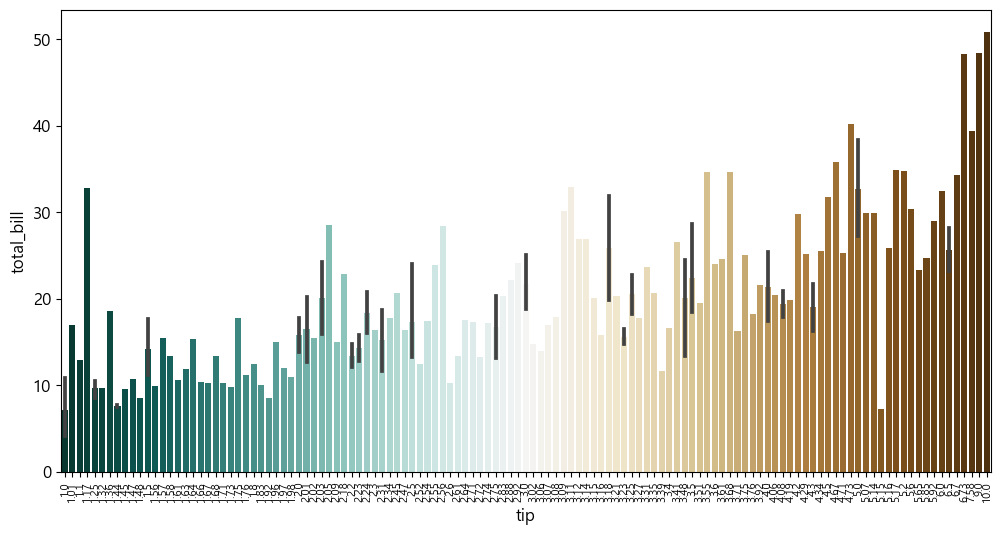

In [24]:
plt.figure(figsize=(12,6))

sns.barplot(data=tips, x='tip', y='total_bill', palette='BrBG_r')

# x축 tick 레이블 각도 변경
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [25]:
# 0-4. pandas 데이터프레임과 높은 호환성

In [26]:
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


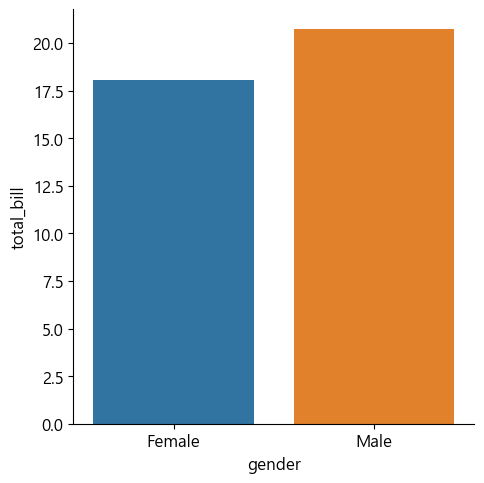

In [27]:
# 데이터 프레임 시각화
sns.catplot(data=tips, 
            x="gender", y="total_bill",
            kind="bar",
            ci=None)
plt.show()

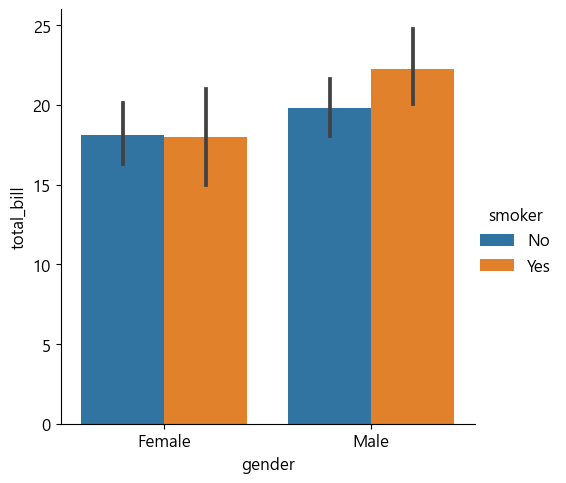

In [28]:
# hue 옵션으로 bar를 구분
# - xtick, ytick, xlabel, ylabel을 알아서 생성해 줌
# - legend 까지 자동으로 생성함
# - 신뢰 구간도 알아서 계산하여 생성
sns.catplot(data=tips,
            x="gender", y="total_bill",
            hue='smoker',
            kind='bar')
plt.show()

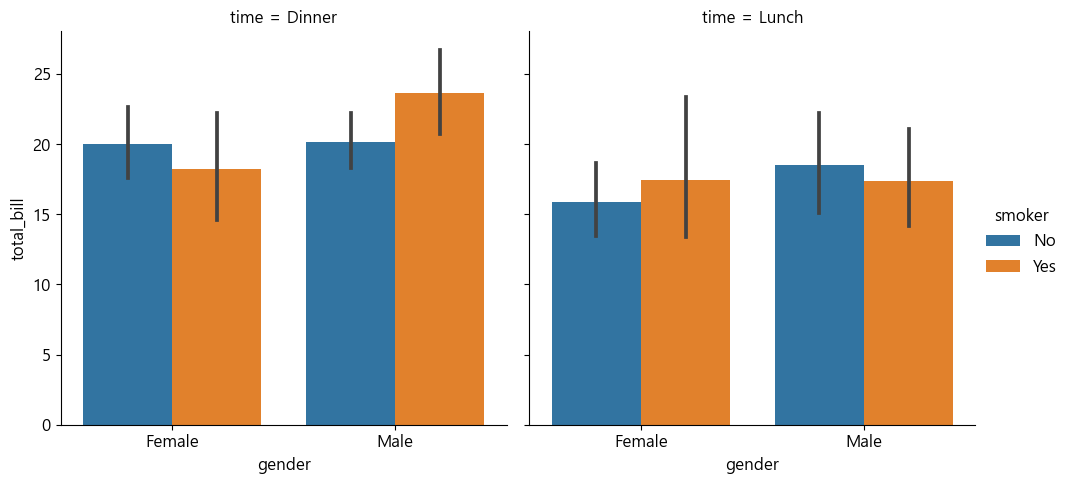

In [29]:
# col옵션 하나로 그래프 자체를 분할해 줌
sns.catplot(data=tips, 
            x="gender", y="total_bill",
            hue="smoker", 
            col="time",
            kind="bar")
plt.show()

In [30]:
# 상관관계 계수 heatmap 시각화
# heatmap으로 시각화할 대상 컬럼은 모두 숫자로 되어있어야함.
# 상관관계 계수를 적용하기 범주형 데이터를 숫자로 변경하기

In [31]:
# [문제] 범주형 데이터를 label로 인코딩하기
# 범주형 데이터 컬럼을 찾기
# 범주형 컬럽의 values 확인
# 범주형 values -> 숫자로 변환

# 데이터 준비
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
# 범주형 데이터인 'gender', 'smoker', 'day', 'time' 열에 레이블 인코딩 적용
# 범주형 데이터를 숫자로 바꾼다?
# 1. lable encoding
# # - ex)          의류, 가전,  식품, 장난감
# # - ex) label     0,     1,    2,    3
# # - ex) one-hot  0001, 0010, 0100, 1000
# 2. one-hot encoding
# # - 

In [33]:
# 먼저 각 값을 알아야 함
# tips['gender'].value_counts()
# tips['smoker'].value_counts()
# tips['day'].value_counts()
# tips['time'].value_counts()

gender
Male      157
Female     87

smoker
No     151
Yes     93

day
Sat     87
Sun     76
Thur    62
Fri     19

time
Dinner    176
Lunch      68

SyntaxError: invalid syntax (742495304.py, line 8)

In [ ]:
# tips = pd.get_dummies(tips, columns=['gender', 'smoker', 'day', 'time'], dtype=int)
# tips
gender_map = {
    'Female': 0, 
    'Male' : 1
}
tips['gender'] = tips['gender'].map(gender_map)
tips

In [ ]:
smoker_map = {
    'No': 0, 
    'Yes' : 1
}
tips['smoker'] = tips['smoker'].map(smoker_map)
tips

In [ ]:
day_map = {
    'Sat': 0, 
    'Sun' : 1,
    'Thur' : 2,
    'Fri' : 3
}
tips['day'] = tips['day'].map(day_map)
tips

In [ ]:
time_map = {
    'Dinner': 0, 
    'Lunch' : 1
}
tips['time'] = tips['time'].map(time_map)
tips

In [ ]:
plt.title('heatmap')
sns.heatmap(tips.corr(), annot=True, linewidths=1)
plt.show()

In [ ]:
# 강사님 방식

# 원본 훼손 방지를 위해 copy
tips_cp = tips.copy()

# 우선 데이터 정보 확인
tips_cp.info()

# 범주형 데이터 확인
tips_cp.select_dtypes(include='object').columns

# 범주형 데이터 컬럼의 값 확인 : value_counts()
# 컬럼의 값 확인
tips_cp['gender'].value_counts().sort_index()

# mapping 값 정의
gen_map = ['Female' : 0,
           'Male' : 1]
tips_cp['gender'] = tips_cp['gender'].map(gen_map)
tips_cp['gender']

# 각 컬럼에 mapping 반복
# 패턴이므로 numpy함수 활용해 변수로 만들어서 for문 돌릴 수 있음
# scinum 쓸 수도 있음

# coloumns 확인
tips_cp.columns

# heatmap 실행

In [ ]:
# data: 히트맵을 그릴 데이터셋, 2차원 배열 형태의 데이터를 입력받음
# annot: 히트맵 셀에 숫자 값을 표시할지 여부를 나타내는 부울값 또는 데이터 배열, 기본값은 False로 숫자 값이 표시되지 않음
# fmt: annot이 True로 설정된 경우 숫자 형식을 지정함, 예를 들어 ".2f"는 소수점 이하 2자리까지 표시하도록 지정함
# cmap: 히트맵의 색상 맵 지정, 예를 들어 "coolwarm", "viridis", "RdYlBu" 등 다양한 색상 맵을 사용할 수 있음
# # viridis: 영역별로 색상이 연속적으로 변화하는 색상 맵
# # plasma: 연속적인 분홍색과 청록색을 갖는 색상 맵
# # inferno: 연속적인 주황색과 검은색을 갖는 색상 맵
# # magma: 연속적인 검은색과 청록색을 갖는 색상 맵입
# # coolwarm: 차가운 색상과 따뜻한 색상이 교대로 나타나는 색상 맵
# # RdBu: 붉은색과 청록색이 교대로 나타나는 색상 맵
# # YlGnBu: 노란색, 녹색, 청록색, 파란색이 연속적으로 변화하는 색상 맵
# linewidths: 히트맵 셀 사이의 경계선 두께 지정
# linecolor: 히트맵 셀 사이의 경계선 색상을 지정
# cbar: 컬러바를 표시할지 여부를 나타내는 부울값임. 기본값은 True로 컬러바가 표시됨
# vmin, vmax : 컬러바의 범위 지정

In [ ]:
plt.title('heatmap')
sns.heatmap(tips.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor="gray", 
            cbar=True,
            vmin=-1,
            vmax=1
           )
plt.show()

In [ ]:
# import

In [ ]:
# 1. Scatterplot

# 데이터 준비
# 0 ~ 1 사이의 임의의 랜덤한 값을 생성함
np.random.rand(50)

In [ ]:
np.arange(50)

In [ ]:
# 1-1. x, y, colors, area 설정하기
# colors 는 임의 값을 color 값으로 변환합니다.
# area는 점의 넓이를 나타냅니다. 값이 커지면 당연히 넓이도 커집니다.

x = np.random.rand(50)
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

In [ ]:
# matplotlib의 산점도 그래프
plt.scatter(x, y, s=area, c=colors)
plt.show()

In [ ]:
# seaborn 에서는 size와 sizes를 동시에 지정할 수 있음
# sizes 옵션에서는 사이즈의 min, max를 명시함
# hue는 컬러 옵션임
# palette를 통해 seaborn이 제공하는 아름다운 palette 사용 가능
# # - Set1, Set2, deep, muted, bright, pastel, dark, colorblind, rocket, viridis, plasma, inferno, cividis, coolwarm, RdBu, husl, gist_gray

In [ ]:
# option 적용
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), hue=area, palette='husl', legend=False)
plt.show()

In [ ]:
# tips 데이터를 활용한 산점도 시각화

# Sample dataset
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)

In [ ]:
# "total_bill"과 "tip" 간의 관계를 시각화

# 식당에서 총 지불한 금액과 팁 금액간의 관계와 금액 분포 시각화
sns.scatterplot(data=tips, x='total_bill', y='tip')

# 그래프 출력
plt.show()

In [ ]:
# [설명]
# 지불 금액이 높을수록 팁도 증가하는 경향을 보임
# 식당의 total_bill이 10 ~ 30사이에 많이 분포하고, 팀은 1~5사이에 많이 분포한다는 것을 알 수 있음

In [ ]:
tips.head()

In [ ]:
# 지불 금액과 팁 사이의 관계를 시간, 성별, 그리고 식사 인원 수와 같은 추가적인 요인에 따라 시각화
# 각 요소 간의 관계 파악하기

In [ ]:
# scatter plot :
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="gender", size="size", palette="Set2")

# legend 사이즈
plt.legend(prop={'size':8})

# display the plot
plt.show()

In [ ]:
# [설명]
# "total_bill"과 "tip" 간의 관계: 일반적으로 지불 금액이 높을수록 팁도 커지는 경향이 있음

# "time"(점심, 저녁)에 따른 분류:
# 식사 시간 Dinner와 Lunch 시간에 따라 "total_bill"과 "tip"의 관계가 다른 것을 알 수 있음
# 점심과 저녁 시간대에서의 팁의 분포가 다름
# 저녁 시간일 수록 지불금액과 팁이 높아지는 경향성이 있음
# "gender"(남,여)에 따른 분류

# 토탈 지불금액이 커질 수록 남자들이 좀더 많은 팁을 지불함
# 남자들이 좀더 높을 금액의 total_bill을 지불하고, 그에 따른 높은 팁을 주는 경향이 있음

# "size"(식사인원수)에 따른 분류:
# 포인트의 크기는 식사 인원 수
# "size"에 따라"total_bill"과 "tip"의 관계가 다른 것을 확인할 수 있음
# 인원 수가 많을수록 지불 금액과 팁의 크기가 증가함.

In [ ]:
# 1-2. 다중 그래프 그리기
# 1개의 canvas 안 여러개 그래프 그리기

# alpha
# alpha값은 투명도를 나타냄
# 0 ~ 1 사이의 값 지정
# 0에 가까울 수록 투명한 값을 가짐

In [ ]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

In [ ]:
#  matplotlib subplot 산점도 
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(x, y, s=area, c='blue', alpha=0.1)
plt.title('alpha=0.1')
plt.subplot(132)
plt.title('alpha=0.5')
plt.scatter(x, y, s=area, c='red', alpha=0.5)
plt.subplot(133)
plt.title('alpha=1.0')
plt.scatter(x, y, s=area, c='green', alpha=1.0)

plt.show()

In [ ]:
# seaborn으로 subplot 산점도 그래프
plt.figure(figsize=(12,6))

plt.subplot(131)
# plt.subplot(1,3,1)
sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='blue', alpha=0.1, legend=False)
plt.title('alpha=0.1')

plt.subplot(132)
plt.title('alpha=0.5')
sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='red', alpha=0.5, legend=False)

plt.subplot(133)
plt.title('alpha=1.0')
sns.scatterplot(x=x, y=y, size=area, sizes=(area.min(), area.max()), color='green', alpha=0.9, legend=False)

plt.show()

In [ ]:
# 2. Barplot, Barhplot

# 2-1. 기본 Barplot 그리기
# matplotlib bar 차트 그리기
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

plt.bar(subject, score, align='center', alpha=0.6, color='red')

plt.xticks(rotation=20)
plt.ylabel('Scores')
plt.title('Scores by Subject')

plt.show()

In [ ]:
# seaborn으로 bar 차트 그리기
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

sns.barplot(x=subject, y=score, alpha=0.8, palette='YlGnBu')

plt.xticks(rotation=20)
plt.ylabel('Scores')
plt.title('Scores by Subject')

plt.show()

In [ ]:
# 2-2. 기본 Barhplot 그리기
# barh 함수에서는 xticks로 설정했던 부분을 yticks로 변경합니다.

# matplotlib으로 barh 차트 그리기
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

plt.barh(subject, score, align='center', alpha=0.7, color='green')
plt.xlabel('Scores')
plt.title('Scores by Subject')

plt.show()

In [ ]:
# seaborn으로 barh 차트 그리기
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

# x, y 축 대입값을 바꿔서 표현
sns.barplot(x=score, y=subject, alpha=0.9, palette='YlOrRd')

plt.xlabel('Scores')
plt.title('Scores by Subject')

plt.show()

In [ ]:
# 차트 결과 높은 값 순으로 표시하기

# 방법1. 리스트를 소팅하여 차트 적용
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

# 방법1 데이터를 내림차순으로 정렬, key=정렬 기준
data = sorted(zip(subject, score), key=lambda x: x[1], reverse=True)
data

In [ ]:
subject_s = [item[0] for item in data]
score_s = [item[1] for item in data]

# # x, y 축 대입값을 바꿔서 표현
sns.barplot(x=score_s, y=subject_s, alpha=0.9, palette='YlOrRd')

plt.xlabel('Scores')
plt.title('Scores by Subject')

plt.show()

In [ ]:
# [문제] 데이터 프레임 만들고 정렬하기
# 방법2. dataframe로 만들어 소팅하여 적용
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score = [66, 80, 60, 50, 80, 10]

df = pd.DataFrame({'subject' : ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics'],
                    'score' : [66, 80, 60, 50, 80, 10]})
df

# zip(subject, score), columns=['subject','score']

In [ ]:
df = df.sort_values('score', ascending=False)
df

In [ ]:
# x, y 축 대입값을 바꿔서 표현
sns.barplot(x=df['score'], y=df['subject'], alpha=0.9, palette='YlOrRd')

plt.xlabel('Scores')
plt.title('Scores by Subject')

plt.show()

In [ ]:
# 2-3 Barplot 비교 그래프 그리기
# **axes.bar(x, height, width=0.8, bottom=None, align='center', **kwargs)**

# x: 막대 그래프의 x 좌표. 보통은 범주 혹은 카테고리의 값들을 의미함
# height: 막대의 높이를 지정하는 값, 보통은 해당 범주에 대한 데이터 값이 사용
# width (선택적): 막대의 너비를 지정하는 값. 기본값은 0.8임
# bottom (선택적): 막대의 시작 위치를 지정하는 값. 기본적으로 막대는 0부터 시작
# align (선택적): 막대의 정렬 방식을 지정하는 값.
# # - 'center', 'edge' 또는 'align' 중 하나를 선택
# # - 기본값은 'center'
# **kwargs: 기타 추가적인 옵션들을 지정할 수 있는 매개변수
# # - 예를 들어, 색상, 투명도, 라벨 등을 설정할 수 있음

In [ ]:
# 두 학생의 과목별 성적 비교하기

subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score1 = [66, 80, 60, 50, 80, 10]
score2 = [55, 90, 40, 60, 70, 20]

# subject 갯수 만큼 숫자리스트 생성(0~5)
sj_num = np.arange(len(subject))
sj_num

In [ ]:
sj_num - 0.4 / 2

In [ ]:
# 넓이 지정, default = 0.8
width = 0.4
sj_num + width / 2

In [ ]:
# 넓이 지정, default=0.8
width = 0.4

# subplots 생성
fig, axes = plt.subplots()

# 막대그래프를 생성하는 역할
# axes.bar(x좌표, height, width=0.8, bottom=None, align='center', **kwargs)
axes.bar(sj_num - width / 2, score1, width, align='center', alpha=0.5)
axes.bar(sj_num + width / 2, score2, width, align='center', alpha=0.8)

# xtick 설정
axes.set_xticks(sj_num)
axes.set_xticklabels(subject)

plt.ylabel('score')
plt.title('Scores by Subject')

plt.xticks(rotation=20)
plt.legend(['john','peter'])

plt.show()

In [ ]:
# matplotlib 다중 barh 차트
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score1 = [66, 80, 60, 50, 80, 10]
score2 = [55, 90, 40, 60, 70, 20]

# subject 갯수 만큼 숫자리스트 생성(0~5)
sj_num = np.arange(len(subject))

# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.barh(sj_num - width/2, score1, width, align='center', alpha=0.5, color='green')
axes.barh(sj_num + width/2, score2, width, align='center', alpha=0.8, color='red')

# ytick 설정
axes.set_yticks(sj_num)
axes.set_yticklabels(subject)

plt.title('Scores by Subject')
plt.legend(['john', 'peter'])

plt.show()

In [ ]:
# Seaborn에서 barplot 비교 차트 그리기

# 카테고리 값에 따른 실수 값의 평균과 편차를 표시함
# 편차 표시 : error bar로 표시

# 실전 tip.
# 그래프를 임의로 그려야 하는 경우 -> matplotlib
# DataFrame을 가지고 그리는 경우 -> seaborn

# seaborn 에서는 hue 옵션으로 매우 쉽게 비교 barplot을 그릴 수 있음

In [ ]:
# tips 데이터 활용
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)

In [ ]:
tips.head()

In [ ]:
# [tip] : error line 또는 error bar
# - 막대의 편차를 표시한 것
# - 설정 : default 3
# # sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=2)
# - 없애고 싶으면
# # sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=0)

In [ ]:
# 성별로 담배를 피는 사람과 안피는 사람별로 tip의 평균 비교

sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted")
# sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=3)
# sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=1)
# sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted", errwidth=0)
plt.legend(loc="best")
plt.show()

In [ ]:
sns.barplot(data=tips, x='gender', y='tip', hue='smoker', palette="muted")
plt.legend(loc="best")
plt.show()

In [ ]:
sns.barplot(data=tips, x='day', y='total_bill', hue='time', palette='muted')
plt.legend(loc='best')
plt.show()

In [ ]:
# titanic 데이터 활용
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
sns.barplot(x='who', y='survived', hue='pclass', data=titanic, palette="muted")
plt.show()

In [ ]:
# b3. Line Plot
# 3-1. 기본 lineplot 그리기

# tips 데이터 활용

In [ ]:
# matplotlib (실제값을 선으로 이어버림)

# 라인 플롯 그리기
plt.plot(tips['day'], tips['tip'])
plt.xlabel('Day of the week')
plt.ylabel('Tip')
plt.title('Tip Amount vs Total Bill')
plt.show()

In [ ]:
# seaborn (평균값을 선으로 이어줌)

# 라인 플롯 그리기
sns.lineplot(data=tips, x='day', y='tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip Amount vs Total Bill')
plt.show()

In [ ]:
# 진한 실선 : 평균
# 음영 표시 부분(ci) : 신뢰 구간(confidence interval)의 표시 여부를 조절하는 역할
# # ci를 명시하지 않으면 : 95% 신뢰구간을 표시함
# # ci= None : 신뢰 구간을 표시하지 않음
# # ci= "sd": 표준 편차를 기반으로 한 신뢰 구간 표시
# # ci= int: 신뢰구간을 숫자로 표시

In [ ]:
# [해설]
# 주말인 토요일과 일요일에 팁이 상대적으로 높은 것을 확인할 수 있음
# : 이는 주말에 식사를 즐기는 사람들이 더 많은 팁을 주는 경향이 있음을 시사함

In [ ]:
# 3-2. 2개 이상의 그래프 그리기
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)

In [ ]:
# 다중 라인 플롯 그리기
# sns.lineplot(data=tips, x='day', y='tip', hue='gender', ci=None)
sns.lineplot(data=tips, x='day', y='tip', hue='gender')
# sns.lineplot(data=tips, x='day', y='tip', hue='gender')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.title('Tip Amount by Day and Gender')
plt.show()

In [ ]:
# flights 데이터 활용
flights = sns.load_dataset("flights")
flights.head()

In [ ]:
may_flights = flights.query("month == 'May'")

sns.lineplot(data=may_flights, x="year", y="passengers")

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers")

plt.show()

In [ ]:
# 피벗테이블 활용
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

In [ ]:
sns.lineplot(data=flights_wide["May"])

plt.xticks(flights_wide.index)
plt.show()

In [ ]:
flights_wide.index

In [ ]:
# 년도별 월별 비행 횟수 확인
sns.lineplot(data=flights_wide)
# plt.legend(loc="best")
plt.legend(loc="best", prop={'size': 8})
plt.xticks(flights_wide.index)
plt.show()

In [ ]:
fmri = sns.load_dataset("fmri")
fmri.head()

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event")

In [ ]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False
)

In [ ]:
# err_style="bars" : # 오차 막대 그래프 표시
# errorbar=("se", 2) :막대 그래프 계산할 때 표준오차로 계산하고, 크기는 2로 표시

sns.lineplot(
    data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", errorbar=("se", 2),
)

In [ ]:
# 5. Histogram
# 5-1. 기본 Histogram 그리기
N = 100000
bins = 30

x = np.random.randn(N)

plt.hist(x, bins=bins)

plt.show()

In [ ]:
sns.distplot(x, bins=bins, kde=False, hist=True, color='g')
# kde을 True로 설정해주면, Density가 Y축에 표기 됩니다.

In [ ]:
sns.distplot(x, bins=bins, kde=True, hist=False, color='g')

In [ ]:
sns.distplot(x, bins=bins, kde=True, hist=True, vertical=True, color='r')
# sharey: y축을 다중 그래프가 share
# tight_layout: graph의 패딩을 자동으로 조절해주어 fit한 graph를 생성

In [ ]:
# 6. Pie Chart
# pie chart 옵션
# - explode: 파이에서 툭 튀어져 나온 비율
# - autopct: 퍼센트 자동으로 표기
# - shadow: 그림자 표시
# - startangle: 파이를 그리기 시작할 각도

# texts, autotexts 인자를 리턴 받습니다.
# texts는 label에 대한 텍스트 효과를
# autotexts는 파이 위에 그려지는 텍스트 효과를 다룰 때 활용합니다.

In [ ]:
labels = ['Samsung', 'Huawei', 'Apple', 'Xiaomi', 'Oppo', 'Etc']
sizes = [20.4, 15.8, 10.5, 9, 7.6, 36.7]
explode = (0.3, 0, 0, 0, 0, 0)

# texts, autotexts 인자를 활용하여 텍스트 스타일링을 적용합니다
patches, texts, autotexts = plt.pie(sizes, 
                                    explode=explode, 
                                    labels=labels,  
                                    autopct='%1.1f%%',
                                    shadow=True, 
                                    startangle=90)

plt.title('Smartphone pie', fontsize=15)

# label 텍스트에 대한 스타일 적용
for t in texts:
    t.set_fontsize(12)
    t.set_color('gray')
    
# pie 위의 텍스트에 대한 스타일 적용
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(18)

plt.show()

In [ ]:
# Seaborn에서는 pie plot을 지원하지 않습니다.

In [ ]:
# 7. Box Plot

# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

In [ ]:
data

In [ ]:
# 7-1 기본 박스플롯 생성

# matplotlib로 boxplot 표현
plt.boxplot(data, showfliers=False)
plt.tight_layout()
plt.show()

In [ ]:
# showfliers는 이상치 표현
# default는 showfliers=True
plt.boxplot(data)
plt.tight_layout()
plt.show()

In [ ]:
# seaborn으로 boxplot 표현

# 수직방향
# sns.boxplot(data, orient='v', width=0.2)
# 수평방향
sns.boxplot(data, orient='h', width=0.2)
plt.show()

In [ ]:
# 7-2. 다중 박스플롯 생성
# seaborn에서 boxplot을 그릴 때는DataFrame을 가지고 그릴 때 주로 활용함
# barplot과 마찬가지로, 용도에 따라 적절한 라이브러리를 사용

# 실전 tip.
# 그래프를 임의로 그려야 하는 경우 -> matplotlib
# DataFrame을 가지고 그리는 경우 -> seaborn

# seaborn 에서는 hue 옵션으로 매우 쉽게 비교 boxplot을 그릴 수 있음

In [ ]:
# tips 데이터 활용
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips.head()

In [ ]:
plt.title("Boxplot로 표현한, 요일 별 팁 범위확인")
sns.boxplot(data=tips, x="tip", y="day")
plt.show()

In [ ]:
# x, y축 방향 바꾸기
plt.title("Boxplot로 표현한, 요일 별 팁 범위확인")
sns.boxplot(data=tips, x="day", y="tip")
plt.show()

In [ ]:
# 이상치 표현 무사히기 whis=np.inf
plt.title("Boxplot로 표현한, 요일 별 팁 범위확인")
sns.boxplot(data=tips, x="tip", y="day", whis=np.inf)
plt.show()

In [ ]:
# 값까지 확인
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁 범위")
# sns.boxplot(data=tips, x="tip", y="day", whis=np.inf)
sns.boxplot(data=tips, x="tip", y="day")
sns.stripplot(data=tips, x="tip", y="day", jitter=True, color="0.4")
plt.show()

In [ ]:
# titanic 데이터 활용
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
sns.boxplot(data=titanic, x='pclass', y='age', hue='survived')
plt.show()

In [ ]:
# 7-3. Box Plot 축 바꾸기
# vert=False 옵션을 통해 표시하고자 하는 축을 바꿀 수 있습니다.
plt.title('Horizontal Box Plot', fontsize=15)
sns.boxplot(data=titanic, x='pclass', y='age', hue='survived', whis=np.inf)
plt.show()

In [ ]:
# violinplot과 swarmplot으로 표현하기
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x='day', y='total_bill', data=tips, inner=None)
sns.swarmplot(x='day', y='total_bill', data=tips, color='0.9')
plt.show()

In [35]:
!pip install -U scikit-learn

                                              0.0/8.4 MB ? eta -:--:--
     -                                        0.3/8.4 MB 6.3 MB/s eta 0:00:02
     --                                       0.6/8.4 MB 7.7 MB/s eta 0:00:02
     ------                                   1.3/8.4 MB 10.0 MB/s eta 0:00:01
     -------                                  1.5/8.4 MB 8.8 MB/s eta 0:00:01
     ---------                                2.1/8.4 MB 9.5 MB/s eta 0:00:01
     ------------                             2.6/8.4 MB 9.7 MB/s eta 0:00:01
     --------------                           3.1/8.4 MB 10.0 MB/s eta 0:00:01
     -----------------                        3.7/8.4 MB 10.2 MB/s eta 0:00:01
     -------------------                      4.2/8.4 MB 10.3 MB/s eta 0:00:01
     ----------------------                   4.7/8.4 MB 10.4 MB/s eta 0:00:01
     -------------------------                5.3/8.4 MB 10.5 MB/s eta 0:00:01
     ---------------------------              5.7/8.4 MB 10.5 MB/

In [44]:
# 8. imshow
# 이미지(image) 데이터와 유사하게 행과 열을 가진 2차원의 데이터를 시각화 할 때는 imshow를 활용합니다.

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.images[:10]
x[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [45]:
# load_digits는 0~16 값을 가지는 array로 이루어져 있습니다.
# 1개의 array는 8 X 8 배열 안에 표현되어 있습니다.
# 숫자는 0~9까지 이루어져있습니다.
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

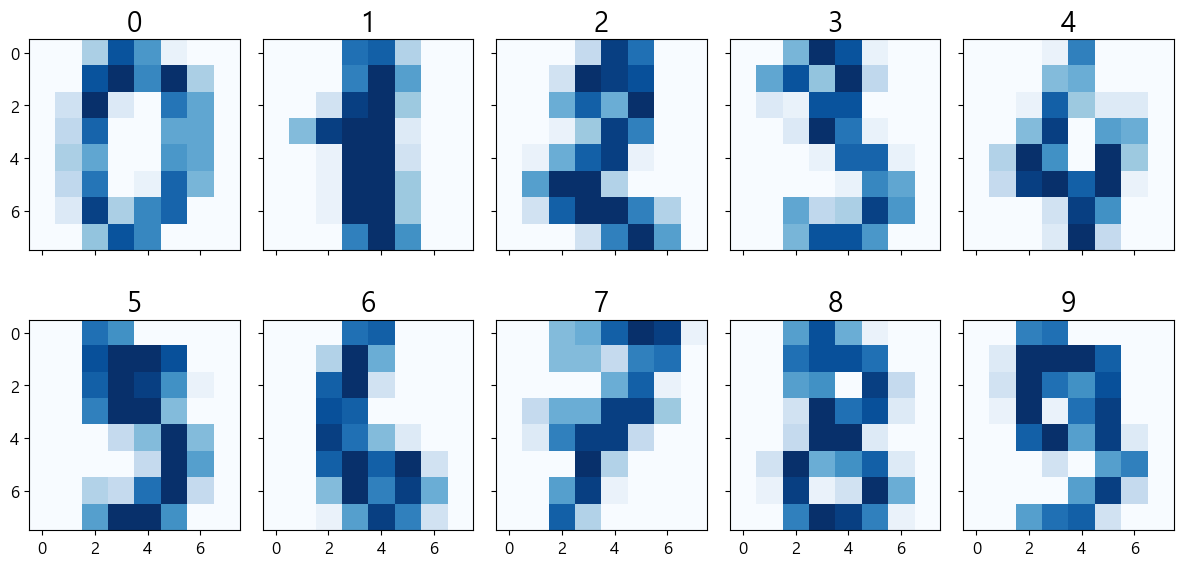

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, figsize=(12, 6), sharey=True)

for i in range(10):
    axes[i//5][i%5].imshow(X[i], cmap='Blues')
    axes[i//5][i%5].set_title(str(i), fontsize=20)
    
plt.tight_layout()
plt.show()